In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LogisticRegressionMBSGD:
    def __init__(self, learning_rate=0.01, num_iterations=1000, batch_size=32, threshold=0.5):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.batch_size = batch_size
        self.threshold = threshold
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss_function(self, y, y_hat):
        epsilon = 1e-5
        return -np.mean(y*np.log(y_hat + epsilon) + (1-y)*np.log(1- y_hat + epsilon))
    
    def predict(self, X):
        y_hat = self.sigmoid(np.dot(X, self.theta))
        return (y_hat >= self.threshold).astype(int)

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        m = X.shape[0]
        num_batches = int(np.ceil(m / self.batch_size))

        for i in range(self.num_iterations):
            shuffled_indices = np.random.permutation(m)
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for j in range(num_batches):
                start = j * self.batch_size
                end = min(start + self.batch_size, m)
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]

                y_hat = self.sigmoid(np.dot(X_batch, self.theta))
                error = y_batch - y_hat
                gradient = np.dot(X_batch.T, error)
                self.theta += self.learning_rate * gradient
            
            if i%10==0:
                y_pred = self.predict(X)
                loss = self.loss_function(y_hat=y_pred, y=y)
                self.loss_history.append(loss) 

In [3]:
class LogisticRegressionSGD:
    
    def __init__(self, learning_rate=0.1, n_iters=1000, threshold=0.5):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.threshold=threshold
        self.loss_history = []

    def loss_function(self, y, y_hat):
        epsilon = 1e-5
        return -np.mean(y*np.log(y_hat + epsilon) + (1-y)*np.log(1- y_hat + epsilon))

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(linear_model)
        # y_pred_class = [1 if i > self.threshold else 0 for i in y_pred]
        # return y_pred_class    
        return (y_pred >= self.threshold).astype(int)

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Stochastic Gradient Descent
        for _ in range(self.n_iters):
            # Randomly shuffle samples
            indexes = np.random.permutation(n_samples)
            X = X[indexes]
            y = y[indexes]
            
            # Update weights and bias for each sample
            for i in range(n_samples):
                linear_model = np.dot(X[i], self.weights) + self.bias
                y_pred = self._sigmoid(linear_model)
                
                # Calculate gradients
                d_weights = (X[i] * (y_pred - y[i])).T
                d_bias = y_pred - y[i]
                
                # Update weights and bias
                self.weights -= self.learning_rate * d_weights
                self.bias -= self.learning_rate * d_bias

            if i%10==0:
                y_pred = self.predict(X)
                loss = self.loss_function(y_hat=y_pred, y=y)
                self.loss_history.append(loss) 
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [4]:
class LogisticRegressionGD:
    def __init__(self, lr=0.01, num_iter=100000,threshold=0.5):
        self.lr = lr
        self.num_iter = num_iter
        # self.fit_intercept = fit_intercept
        # self.verbose = verbose
        self.threshold = threshold  
        self.loss_history = []
        
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def predict_prob(self, X):
        # if self.fit_intercept:
        #     X = self.add_intercept(X)
    
        return self.sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X) >= self.threshold
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def loss_function(self, y, y_hat):
        epsilon = 1e-5
        return -np.mean(y*np.log(y_hat + epsilon) + (1-y)*np.log(1- y_hat + epsilon))
    
    def fit(self, X, y):
        # if self.fit_intercept:
        #     X = self.add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
    
            if i%10==0:
                y_pred = self.predict(X)
                loss = self.loss_function(y_hat=y_pred, y=y)
                self.loss_history.append(loss) 

    


In [5]:
df = pd.read_csv('data.csv')

#dropping the id column
df.drop(["id"], axis=1,inplace=True)

#changing diagnosis to categorical
diagnosis = []
for entry in df.diagnosis:
    if entry == "M":
        diagnosis.append(1)
    else:
        diagnosis.append(0)

df.diagnosis = diagnosis            

#inserting diagnosis at the end
first_column = df.pop('diagnosis')
df.insert(30, 'diagnosis', first_column)

df.describe()



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,568.000000,569.000000,568.000000,569.000000,569.000000,569.000000,568.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,567.000000,569.000000,569.000000,568.000000,569.000000,569.000000,569.000000,569.000000
mean,14.116125,19.289649,92.023468,654.889104,0.096360,0.104341,0.088925,0.048919,0.181162,0.062798,...,25.677223,107.261213,881.402469,0.132369,0.254265,0.272455,0.114606,0.290076,0.083946,0.372583
std,3.517065,4.301036,24.285650,351.914129,0.014064,0.052813,0.079734,0.038803,0.027414,0.007060,...,6.146258,33.602542,570.185385,0.022832,0.157336,0.208711,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.697500,16.170000,75.200000,420.300000,0.086370,0.064920,0.029575,0.020310,0.161900,0.057700,...,21.080000,84.110000,514.650000,0.116600,0.147200,0.114475,0.064930,0.250400,0.071460,0.000000
50%,13.355000,18.840000,86.290000,551.100000,0.095870,0.092630,0.061545,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.227450,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.150000,782.700000,0.105300,0.130400,0.131000,0.074000,0.195700,0.066120,...,29.720000,125.400000,1086.000000,0.146000,0.339100,0.383500,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
#imputing missing values using means / Feature Engineering Task 1
df_norm = df

column_means = df_norm.mean()
df_norm = df_norm.fillna(column_means)


#Feature Engineering Task 2
df_norm.drop(["diagnosis"], axis=1,inplace=True)
df_norm = (df_norm - df_norm.mean())/df_norm.std()
df_norm.insert(30, 'diagnosis', diagnosis)
df_norm

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.102422,-2.071512,1.268389,0.983510,1.567087,3.280628,2.650837,2.530249,2.215566,2.253764,...,-1.358098,2.301575,1.998658,1.306537,2.614365,2.107374,2.294058,2.748204,1.935312,1
1,1.836635,-0.353322,1.684639,1.907030,-0.826235,-0.486643,-0.025417,0.547662,0.001391,-0.867889,...,-0.368879,1.533776,1.887973,-0.375282,-0.430066,-0.147968,1.086129,-0.243675,0.280943,1
2,1.586206,0.455786,1.565122,1.557513,0.941382,1.052000,1.361666,2.035440,0.938859,-0.397658,...,-0.023953,1.346291,1.454016,0.526944,1.081980,0.853340,1.953282,1.151242,0.201214,1
3,-0.767260,0.253509,-0.595257,-0.763792,3.280667,3.399917,1.913989,1.450431,2.864862,4.906602,...,0.133866,-0.249720,-0.551147,3.391291,3.889975,1.987485,2.173873,6.040726,4.930672,1
4,1.756953,-1.150804,1.775308,1.824624,0.280125,0.538866,1.369198,1.427237,-0.009552,-0.561956,...,-1.465481,1.337363,1.218589,0.220362,-0.313119,0.611645,0.728618,-0.867590,-0.396751,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.118368,0.720838,2.059677,2.341795,1.040926,0.218868,1.945370,2.318924,-0.312314,-0.930209,...,0.117596,1.751022,2.012713,0.378033,-0.273077,0.662958,1.627719,-1.358963,-0.708467,1
565,1.711420,2.083301,1.614577,1.722326,0.102368,-0.017817,0.691347,1.262558,-0.217473,-1.057681,...,2.045599,1.420690,1.492668,-0.690623,-0.394473,0.235195,0.733182,-0.531387,-0.973122,1
566,0.706858,2.043775,0.670803,0.577445,-0.839745,-0.038646,0.045004,0.105684,-0.808406,-0.894800,...,1.373645,0.578492,0.426222,-0.808876,0.350427,0.325352,0.413705,-1.103578,-0.318129,1
567,1.845172,2.334403,1.981372,1.733693,1.524426,3.269267,3.294795,2.656528,2.135315,1.042778,...,2.235958,2.301575,1.650790,1.429169,3.901415,3.195002,2.287972,1.917396,2.217684,1


In [7]:
def train_test_split(df, train_size, randomize=True):
    '''
    Randomizes the data and Splits the data points into training and testing values in the ratio given.
    '''
    data = np.array(df)
    train_size = train_size

    if randomize:
        np.random.shuffle(data)

    X = data[:, :-1]
    y = data[:, -1]

    train = int(train_size * X.shape[0])
    test = int((1-train_size) * X.shape[0])

    X_train = X[0: train]
    X_test = X[train : train+test]
    y_train = y[0: train]
    y_test = y[train : train+test]

    return X_train, X_test, y_train, y_test

In [8]:
x_tr, x_te, y_tr, y_te = train_test_split(df,randomize=False, train_size=0.67)

In [9]:
x_tr_n, x_te_n, y_tr_n, y_te_n = train_test_split(df_norm, randomize=False, train_size=0.67)

In [10]:
def report(y_pred, y_test):
        '''
        calculates precision and recall metrics
        Parameters:
            y_pred: predicted labels on a testing set
            y_test: true labels of the testing set
        '''
        
        TP=0
        TN=0
        FP=0
        FN=0
        Total=len(y_pred)
        for pred, test in zip(y_pred, y_test):
            if pred==test:
                if pred==0:
                    TN+=1
                else:
                    TP+=1
            else:
                if pred==1:
                    FP+=1
                else:
                    FN+=1
        
        accuracy = (TP+TN) / Total
        recall = TP / (TP+FN)
        precision = TP / (TP+FP)
        
        return {'TP':TP, 'TN':TN, 'FP':FP, 'FN':FN, 'Total':Total, 'Accuracy':accuracy, 'Recall':recall, 'Precision':precision}

GD Using Non-Normalized Data : 

C:\Users\sk193\AppData\Local\Temp\ipykernel_11644\564119133.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


{'TP': 41,
 'TN': 82,
 'FP': 62,
 'FN': 2,
 'Total': 187,
 'Accuracy': 0.6577540106951871,
 'Recall': 0.9534883720930233,
 'Precision': 0.39805825242718446}

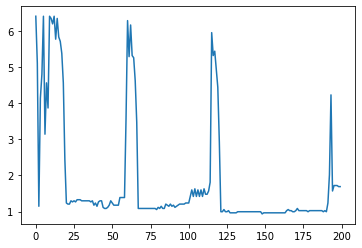

In [23]:
model = LogisticRegressionGD(num_iter=2000, lr=0.01, threshold=0.5)
model.fit(x_tr,y_tr)
y_pred = model.predict(x_te)

y_p=[]
for i in range(len(y_pred)):
    if y_pred[i]:
        y_p.append(1)
    else:
        y_p.append(0)

losses = model.loss_history
plt.plot(losses)

report(y_p,y_te)
        

GD Using Normalized Data :

{'TP': 38,
 'TN': 144,
 'FP': 0,
 'FN': 5,
 'Total': 187,
 'Accuracy': 0.9732620320855615,
 'Recall': 0.8837209302325582,
 'Precision': 1.0}

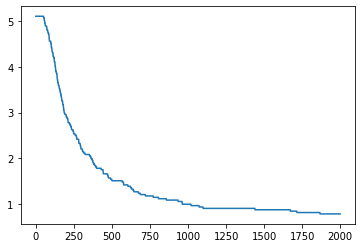

In [71]:
model = LogisticRegressionGD(num_iter=20000, lr=0.0001, threshold=0.7)
model.fit(x_tr_n,y_tr_n)
y_pred = model.predict(x_te_n)

y_p=[]
for i in range(len(y_pred)):
    if y_pred[i]:
        y_p.append(1)
    else:
        y_p.append(0)

losses = model.loss_history
plt.plot(losses)

report(y_p,y_te_n)

SGD Using Non-Normalized Data :

C:\Users\sk193\AppData\Local\Temp\ipykernel_11644\156535659.py:54: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


{'TP': 42,
 'TN': 81,
 'FP': 63,
 'FN': 1,
 'Total': 187,
 'Accuracy': 0.6577540106951871,
 'Recall': 0.9767441860465116,
 'Precision': 0.4}

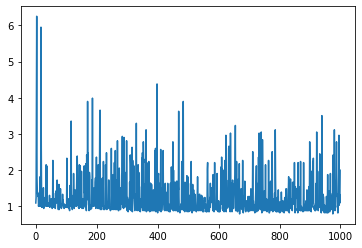

In [31]:
model = LogisticRegressionSGD(learning_rate=0.01, threshold=0.7)
model.fit(x_tr,y_tr)
y_pred = model.predict(x_te)

y_p=[]
for i in range(len(y_pred)):
    if y_pred[i]:
        y_p.append(1)
    else:
        y_p.append(0)

losses = model.loss_history
plt.plot(losses)

report(y_p,y_te)        

SGD Using Normalized Data : 

{'TP': 42,
 'TN': 143,
 'FP': 1,
 'FN': 1,
 'Total': 187,
 'Accuracy': 0.9893048128342246,
 'Recall': 0.9767441860465116,
 'Precision': 0.9767441860465116}

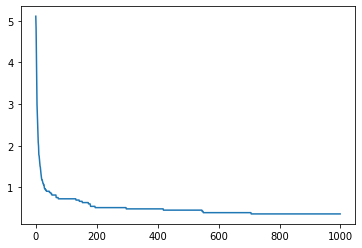

In [76]:
model = LogisticRegressionSGD(learning_rate=0.0001, threshold=0.7)
model.fit(x_tr_n,y_tr_n)
y_pred = model.predict(x_te_n)

y_p=[]
for i in range(len(y_pred)):
    if y_pred[i]:
        y_p.append(1)
    else:
        y_p.append(0)

losses = model.loss_history
plt.plot(losses)        

report(y_p,y_te_n)        

MBSGD Using Non-Normalized Data : 

C:\Users\sk193\AppData\Local\Temp\ipykernel_11644\4178412654.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


[6.406137817800887, 1.5713092761021046, 2.6893633763699483, 2.477839627670626, 1.1784794570890784, 1.9339214167295133, 0.9971733867753738, 2.2058805222000695, 1.1180441003178434, 1.0273910651609914, 1.4202208841740174, 1.2086971354746956, 0.9971733867753739, 0.9669557083897565, 0.9971733867753739, 1.0273910651609914, 0.9669557083897565, 1.0878264219322262, 1.0273910651609914, 1.1784794570890782, 1.7223976680301911, 1.087826421932226, 1.2086971354746958, 0.9971733867753739, 1.0273910651609914, 1.0878264219322262, 0.936738030004139, 1.0273910651609914, 0.9971733867753739, 1.1784794570890784, 0.936738030004139, 1.0273910651609914, 0.9971733867753739, 1.0273910651609914, 0.9971733867753739, 0.936738030004139, 0.9669557083897565, 1.0273910651609914, 2.0850098086576, 0.936738030004139, 1.8734860599582783, 1.2691324922459304, 1.0273910651609912, 0.9669557083897565, 0.9669557083897565, 1.2389148138603132, 1.1180441003178434, 1.4202208841740174, 0.9971733867753739, 0.9669557083897566, 0.9971733

{'TP': 38,
 'TN': 113,
 'FP': 31,
 'FN': 5,
 'Total': 187,
 'Accuracy': 0.8074866310160428,
 'Recall': 0.8837209302325582,
 'Precision': 0.5507246376811594}

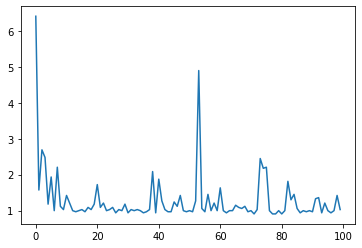

In [36]:
model = LogisticRegressionMBSGD(learning_rate=0.01, threshold=0.7)
model.fit(x_tr,y_tr)
y_pred = model.predict(x_te)

y_p=y_pred

losses = model.loss_history
print(losses)
plt.plot(losses)

report(y_p,y_te)

MBSGD Using Normalized Data :

C:\Users\sk193\AppData\Local\Temp\ipykernel_11644\4178412654.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


{'TP': 32,
 'TN': 143,
 'FP': 1,
 'FN': 11,
 'Total': 187,
 'Accuracy': 0.9358288770053476,
 'Recall': 0.7441860465116279,
 'Precision': 0.9696969696969697}

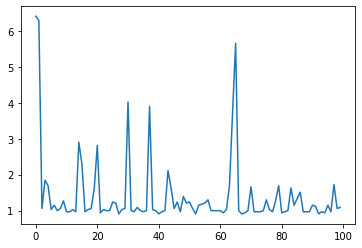

In [81]:
model = LogisticRegressionMBSGD(learning_rate=0.0001, threshold=0.7)
model.fit(x_tr,y_tr)
y_pred = model.predict(x_te)

y_p=y_pred

losses = model.loss_history
plt.plot(losses)

report(y_p,y_te)

Comparison with Logistic Regression from Sci-kit Learn Library :

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none', max_iter=1000)
model.fit(x_tr_n,y_tr_n)
y_pred = model.predict(x_te_n)
report(y_pred,y_te_n)

{'TP': 41,
 'TN': 131,
 'FP': 13,
 'FN': 2,
 'Total': 187,
 'Accuracy': 0.9197860962566845,
 'Recall': 0.9534883720930233,
 'Precision': 0.7592592592592593}